In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('concrete_data.csv')

In [ ]:
display(data)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
x = data.iloc[:1028, :8]
y = data.iloc[:1028, 8:]

features = data.columns[:-1]
print(features)

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')


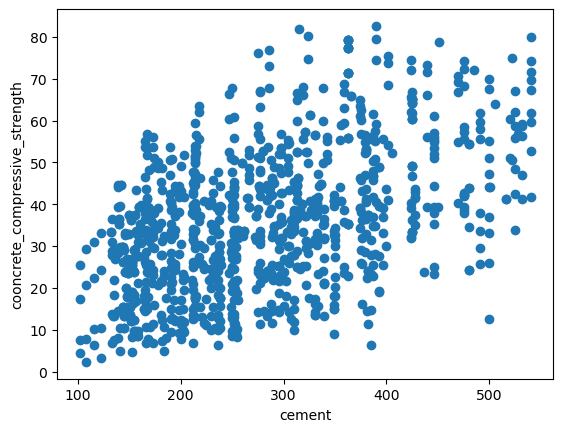

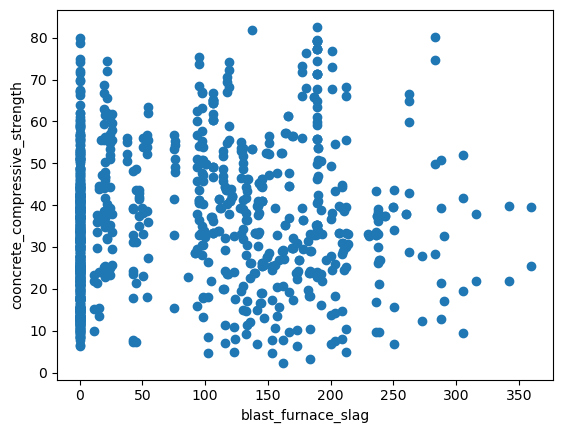

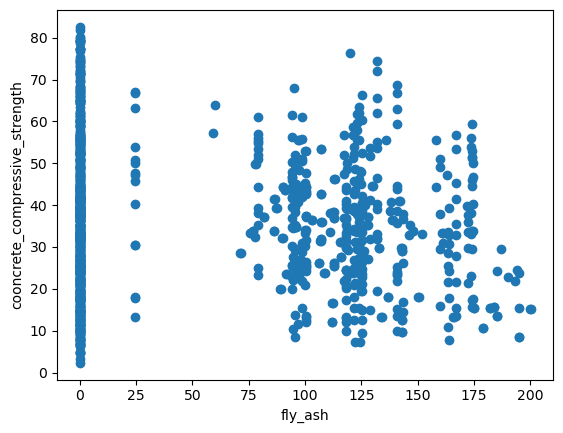

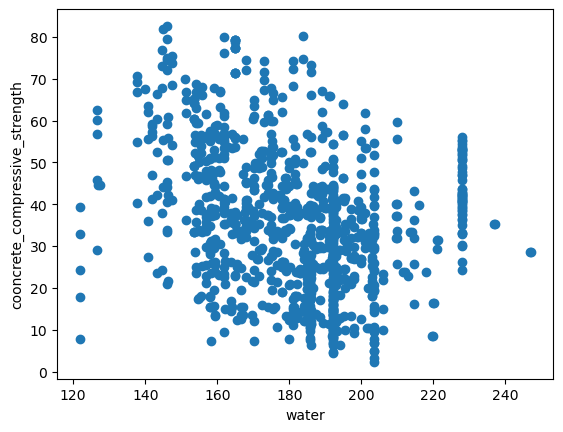

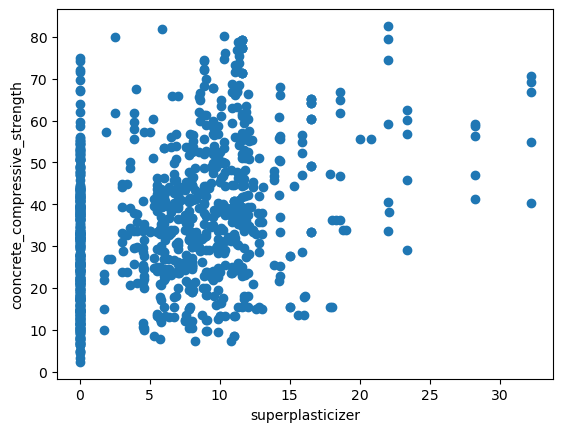

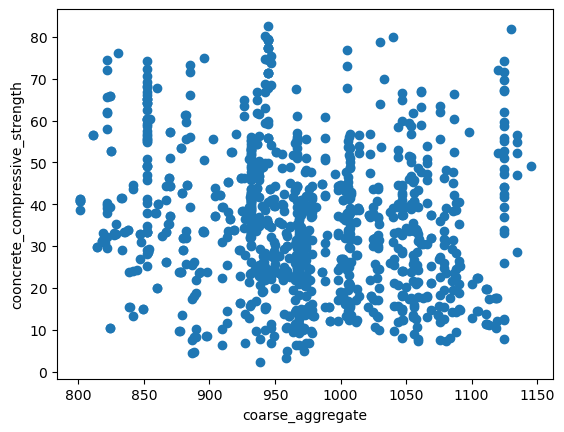

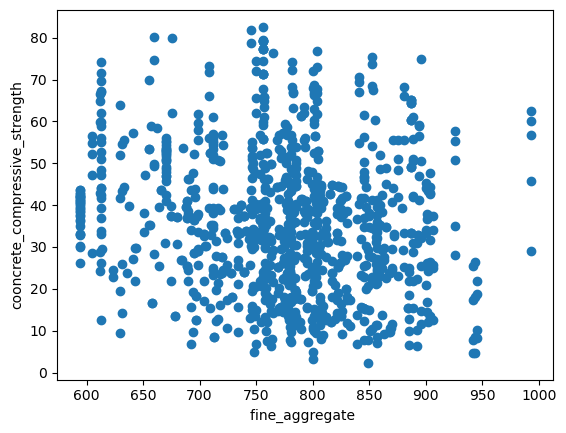

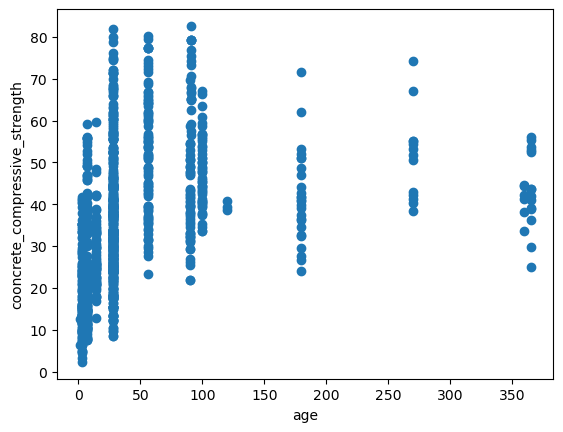

In [ ]:
for i in range(8):
    plt.scatter(x.iloc[:,i], y)
    plt.xlabel(features[i])
    plt.ylabel('cooncrete_compressive_strength')
    plt.show()

In [ ]:
X = data.iloc[:1028, :5:4]
display(X)

,cement,superplasticizer
0,540.0,2.5
1,540.0,2.5
2,332.5,0.0
3,332.5,0.0
4,198.6,0.0
...,...,...
1023,159.8,12.2
1024,166.0,12.7
1025,276.4,8.9
1026,322.2,10.4


In [ ]:
X = np.vstack((np.ones((X.shape[0], )),X.T)).T
display(X)

array([[  1. , 540. ,   2.5],
       [  1. , 540. ,   2.5],
       [  1. , 332.5,   0. ],
       ...,
       [  1. , 276.4,   8.9],
       [  1. , 322.2,  10.4],
       [  1. , 148.5,   6.1]])

In [ ]:
def model (X, y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    theta_list = np.zeros((iteration, len(theta)))
    for i in range(iteration):
        Y = np.dot(X, theta)
        cost = (1/(2*m)) * np.sum(np.square(Y - y))
        d_theta = (1/m) * np.dot(X.T, Y - y)
        theta -= learning_rate * d_theta
        cost_list.append(cost)
        theta_list[i,:] = theta.T
    print(cost)
    return theta, cost_list, theta_list

concrete_compressive_strength    95.755219
dtype: float64


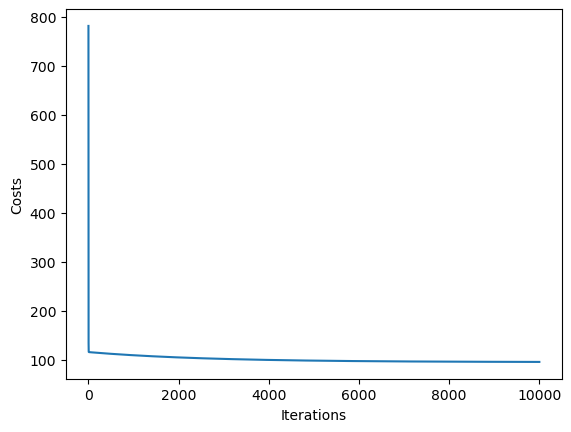

In [ ]:
learning_rate = 0.000005
iteration = 10000
theta, cost_list, theta_list = model(X,y,learning_rate, iteration)

rng = np.arange(0,iteration)
plt.plot(rng, cost_list)
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.show()

In [ ]:
display(data.iloc[1028:, :])

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
array = np.array([1,159.1, 11.3])
predict = np.dot(array, theta)
print(predict)

[27.64473332]


In [ ]:
array = np.array([1,260.9, 8.6])
predict = np.dot(array, theta)
print(predict)

[35.17154342]


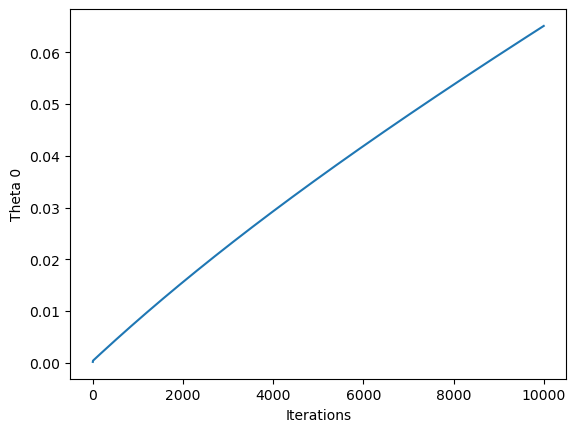

In [ ]:
plt.plot(rng, theta_list[:,0])
plt.xlabel('Iterations')
plt.ylabel('Theta 0')
plt.show()


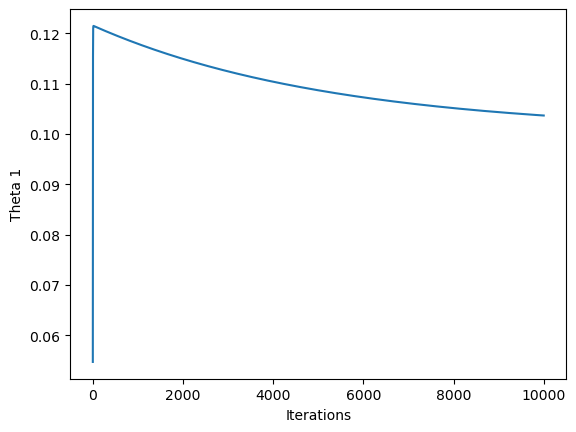

In [ ]:
plt.plot(rng, theta_list[:,1])
plt.xlabel('Iterations')
plt.ylabel('Theta 1')
plt.show()

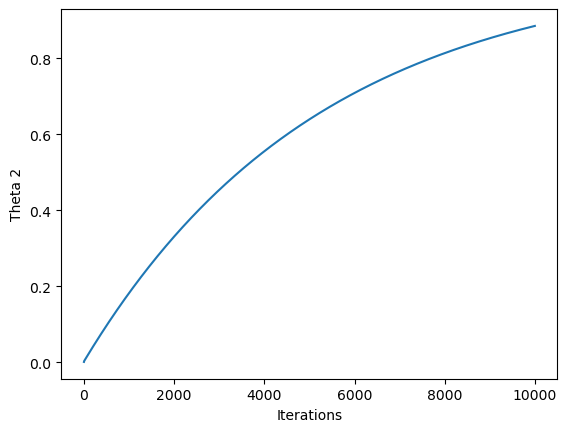

In [ ]:
plt.plot(rng, theta_list[:,2])
plt.xlabel('Iterations')
plt.ylabel('Theta 2')
plt.show()

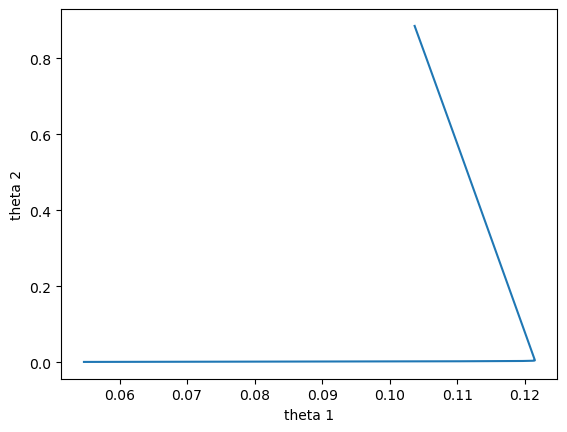

In [ ]:
plt.plot(theta_list[:,1], theta_list[:,2])
plt.xlabel('theta 1')
plt.ylabel('theta 2')
plt.show()

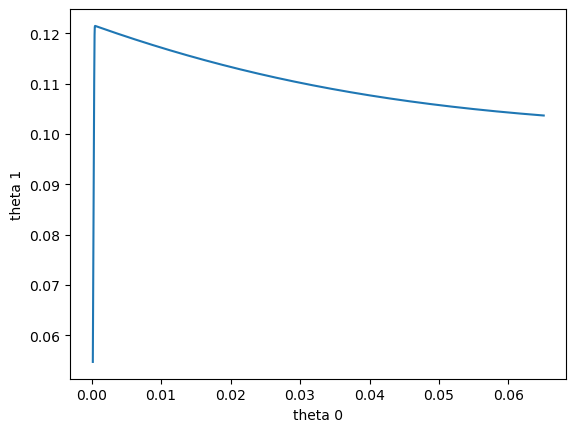

In [ ]:
plt.plot(theta_list[:,0], theta_list[:,1])
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.show()